# Solving Elliptic Curve Discrete Logarithm Problem with Shor's Algorithm

## 1. Introduction and Problem Statement

The **Elliptic Curve Discrete Logarithm Problem (ECDLP)** is a fundamental cryptographic challenge that underlies the security of elliptic curve cryptography (ECC). While classical algorithms require exponential time to solve ECDLP, Shor's quantum algorithm can solve it efficiently in polynomial time.


### Elliptic Curve Definition

An elliptic curve is a special type of mathematical curve defined by a cubic equation. For our purposes, we can think of it as the set of points $(x, y)$ that satisfy the **Weierstrass equation**:

$$E : y^2 = x^3 + ax + b$$

where $a$ and $b$ are constants that define the specific shape of the curve.

**Key Properties**:

- **Smooth curve**: The curve has no sharp corners, breaks, or self-intersections (this requires $4a^3 + 27b^2 \neq 0$)
- **Symmetric**: The curve is symmetric about the x-axis - if $(x, y)$ is on the curve, then $(x, -y)$ is also on the curve
- **Point at infinity**: We add a special "point at infinity" denoted $\mathcal{O}$ that serves as the identity element for point addition , as will be explained in the next section. 


**Cryptographic Context**:

For cryptographic applications like Bitcoin's digital signatures, we work with elliptic curves over **finite fields** $\mathbb{F}_p$ where $p$ is a large prime number. Instead of the smooth curves we might visualize over real numbers, we get a discrete set of points:

$$E(\mathbb{F}_p) = \{(x, y) \in \mathbb{F}_p \times \mathbb{F}_p \mid y^2 = x^3 + ax + b\} \cup \{\mathcal{O}\}$$


The crucial property for cryptography is that these points form a **group** under a special addition operation. This means:
- You can **"add"** any two points on the curve to get another point on the curve
- There's an identity element ($\mathcal{O}$) where $P + \mathcal{O} = P$ for any point $P$
- Every point has an inverse
- Addition is associative: $(P + Q) + R = P + (Q + R)$


### How Elliptic Curve Point Addition Works


**The elliptic curve "addition" operation geometric interpretation**: To add two points $P$ and $Q$ on the curve, draw a straight line through them. This line will intersect the elliptic curve at exactly one more point $R'$. The sum $P + Q$ is then defined as the reflection of $R'$ across the x-axis.


<img src="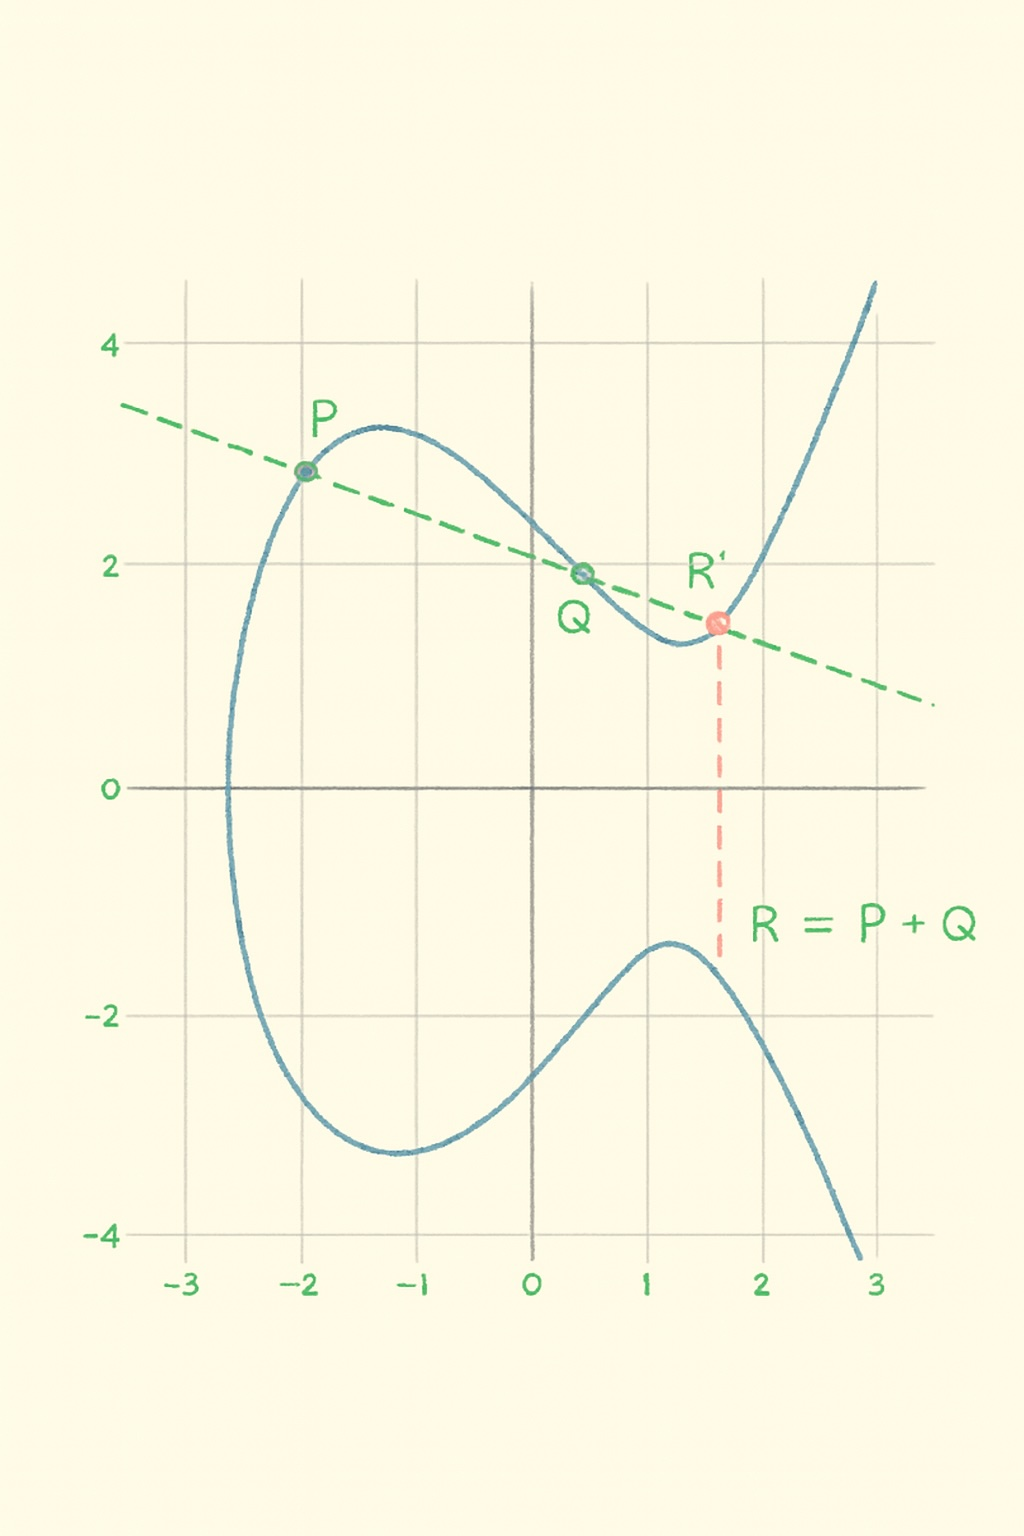
" width="300" height="300">


***Figure 1**: Visualized representation of the addition operation on the elliptic curve $y^2 = x^3 - 5x + 6$ over the real field.*

**Algebraic Process**:
This geometric process translates into explicit coordinate formulas:
1. Calculate a slope $\lambda$ based on the input points
2. Use $\lambda$ to compute the x-coordinate of the result: $x_3 = \lambda^2 - x_1 - x_2$
3. Use $\lambda$ and $x_3$ to compute the y-coordinate: $y_3 = \lambda(x_1 - x_3) - y_1$

**Elliptic Curve Addition Cases**:
In general, elliptic curve point addition must handle several cases:
1. **Generic case**: Two distinct points $P \neq Q$ where $P \neq -Q$
  - Slope: $\lambda = \frac{y_Q - y_P}{x_Q - x_P} \pmod{p}$
2. **Point doubling**: Adding a point to itself $P + P$
  - Slope: $\lambda = \frac{3x_P^2 + a}{2y_P} \pmod{p}$
3. **Inverse points**: $P + (-P) = \mathcal{O}$ (point at infinity)
4. **Adding point at infinity**: $P + \mathcal{O} = P$

**Group Property**:
This addition rule ensures that the sum of any two points on the curve is always another point on the curve, maintaining the group property essential.



### The Elliptic Curve Discrete Logarithm Problem (ECDLP)

*<div class="alert alert-success">Formally, an instance of the **Elliptic Curve Discrete Logarithm Problem (ECDLP)** is defined as follows: Let $G \in E(\mathbb{F}_p)$ be a fixed and publicly known generator of a cyclic subgroup of $E(\mathbb{F}_p)$ with known order $\text{ord}(G) = r$. Let $P \in \langle G \rangle$ be a fixed and publicly known element in the subgroup generated by $G$. **The problem is to find the unique integer $l \in \{1, 2, \ldots, r\}$, called the discrete logarithm, such that $P = l \cdot G$.** </div>*




**Why "Logarithm" for Point Addition?**

The term **"discrete logarithm"** might seem confusing at first in the context of elliptic curves, since the group operation here is **point addition**, not multiplication. However, the **elliptic curve discrete logarithm problem (ECDLP)** is a **special case of the general discrete logarithm problem (DLP)** (see the ["discrete log" notebook](https://github.com/Classiq/classiq-library/blob/main/algorithms/algebraic/discrete_log/discrete_log.ipynb)), where the group happens to be defined by elliptic curve point addition rather than modular multiplication.

In the Discrete Logarithm Problem, the group operation is modular multiplication, and exponentiation refers to repeated multiplication . In the elliptic curve setting, the scalar multiplication $l \cdot G$ refers to adding the point $G$ to itself $l$ times.

Below is a comparison of the two settings:

|               | **Discrete Logarithm Problem (DLP)**         | **Elliptic Curve DLP (ECDLP)**                |
|---------------------------|-----------------------------------------------|-----------------------------------------------|
| **Group operation**       | Modular multiplication                        | Modular point addition                                |
| **Expression**            | Modular exponentiation: $g^l = h$             | Modular scalar multiplication: $l \cdot G = P_{target}$ |
| **Goal**                  | Find $l$ given $g$ and $h$                    | Find $l$ given $G$ and $P_{target}$           |


In both cases:
- A **generator** element ($g$ or $G$) is known
- A **target** element ($h$ or $P_{target}$) is known
- The task is to find the **exponent or scalar** $l$ such that the group operation applied to the generator yields the target

The term "logarithm" is used by analogy: just as logarithms solve for exponents in multiplicative groups, the discrete logarithm solves for the scalar in additive or elliptic curve groups.



### Real-World Impact and Applications

**Cryptographic Applications**:


- **Digital Signatures**: Power cryptocurrency systems like Bitcoin and Ethereum, enabling secure ownership proofs without revealing private keys  
- **TLS/SSL Certificates**: Use ECC-based key exchange (e.g., ECDHE) to secure HTTPS traffic across the internet  
- **Mobile Communications**: Employ protocols such as ECDSA and ECIES for device authentication and secure messaging in 4G/5G networks  
- **Lightweight Cryptography**: ECC is well-suited for resource-constrained environments, and is used in protocols like DTLS and TLS-PSK for IoT security  
- **Secure Messaging and Encryption Standards**: ECC forms the basis of cryptographic protocols in standards like Suite B, used in high-security communications


**Why ECC is Preferred Over RSA**:

Elliptic curve cryptography offers the same security as RSA but with much smaller key sizes:
- **ECC-256** provides security equivalent to **RSA-3072**
- Smaller keys mean faster computations and less storage
- Critical for resource-constrained devices like smartphones and IoT sensors









### Our Specific Example $E(\mathbb{F}_7)$

We'll work with a concrete example on a small finite field to demonstrate the concepts, following the approach outlined in Roetteler et al. [[1]](#Roetteler). Our specific example will demonstrate elliptic curve operations over points $(x, y) \in \mathbb{F}_7 \times \mathbb{F}_7$:

**Elliptic Curve**: $y^2 = x^3 + 5x + 4 \pmod{7}$


**Problem**: Find the discrete logarithm $l$ such that:
$$l \cdot G = P_{target}$$

Where:
- **Generator point** $G = [0, 5]$ 
- **Target point** $P_{target} = [0, 2]$

This means we need to find how many times we must add $G$ to itself to get $P_{target}$.

**Solution**: $l = 4$, since $4 \cdot [0, 5] = [0, 2]$

Let's verify by computing the multiples of $G = [0, 5]$:
- $1 \cdot G = [0, 5]$
- $2 \cdot G = [0, 5] + [0, 5] = [2, 1]$ (point doubling)
- $3 \cdot G = [2, 1] + [0, 5] = [2, 6]$
- $4 \cdot G = [2, 6] + [0, 5] = [0, 2]$ ✓

Therefore, $l = 4$ is indeed the discrete logarithm we're seeking.




**Curve Properties**

The elliptic curve $y^2 = x^3 + 5x + 4 \pmod{7}$ contains the following points:
- $[0, 2], [0, 5], [2, 1], [2, 6], [3, 2], [3, 5], [4, 2], [4, 5], [5, 0]$
- Plus the point at infinity $\mathcal{O}$

**Generator $G = [0, 5]$ properties**:

- Multiples: $1 \cdot G = [0, 5]$, $2 \cdot G = [2, 1]$, $3 \cdot G = [2, 6]$, $4 \cdot G = [0, 2]$, $5 \cdot G = \mathcal{O}$
- Order: $r=5$ (since $5 \cdot G = \mathcal{O}$)
  
***Note:** The order $r$ is the smallest positive integer such that $r \cdot G = \mathcal{O}$ (point at infinity).* 

In [1]:
# Define our elliptic curve and problem parameters
class EllipticCurve:
    def __init__(self, p, a, b):
        """
        Represents an elliptic curve of the form y^2 = x^3 + a*x + b (mod p)
        """
        self.p = p
        self.a = a
        self.b = b

    def __repr__(self):
        return f"EllipticCurve(p={self.p}, a={self.a}, b={self.b})"


# Problem parameters for our specific ECDLP instance
CURVE = EllipticCurve(p=7, a=5, b=4)
GENERATOR_G = [0, 5]
GENERATOR_ORDER = 5
INITIAL_POINT = [4, 2]
TARGET_POINT = [0, 2]

## 2. Shor's Algorithm for ECDLP


Shor's quantum algorithm [[2]](#Shor) provides an efficient way to solve the discrete logarithm problem that would be intractable for classical computers. The algorithm proceeds as follows:

### Algorithm Overview

1. **Superposition Preparation**: Create two quantum registers in a superposition of all possible integers between 0 and a large number
2. **Periodic Function Evaluation**: Apply a periodic function that takes the two registers as input and computes the output in an auxiliary register
3. **Period Extraction**: Apply an inverse Quantum Fourier Transform to reveal the hidden period of the function

Shor's algorithm for solving the ECDLP is analogous to Shor's algorithm for integer factorization. Both prepare large superpositions of inputs, feed them to a periodic function, and exploit the QFT routine to reveal hidden periodicities that allow efficient computation of the discrete logarithm (see the ["discrete log" notebook](https://github.com/Classiq/classiq-library/blob/main/algorithms/algebraic/discrete_log/discrete_log.ipynb)).

#### The Periodic Function for Elliptic Curve

The key function evaluated in quantum superposition is:
$$f(x_1, x_2) = x_1 \cdot G - x_2 \cdot P_{target} = (x_1 - x_2 \cdot l) \cdot G$$

where the last equality holds by the definition of the discrete logarithm $l$ (since $P_{target} = l \cdot G$).


The function $f$ exhibits periodicity in both variables:
$$\forall k, \quad f(x_1 + k \cdot l, x_2 + k) = f(x_1, x_2)$$

where $r$ is the order of the generator $G$. 

When the quantum measurement finds inputs where $f(x_1, x_2) = \mathcal{O}$, the quantum Fourier transform extracts this period structure, revealing relationships that allow us to solve for the discrete logarithm $l$.



*In our quantum implementation, we actually evaluate $P_0 + x_1 \cdot G - x_2 \cdot P_{target}$ where $P_0$ serves as an auxiliary starting point that doesn't affect the final discrete logarithm but helps avoid certain edge cases in the quantum arithmetic.*








### Quantum Oracle Function Implementation 

The core of our implementation is the `shor_ecdlp` quantum function that orchestrates the entire algorithm. 

It implements the function
$$
|x_1\rangle|x_2\rangle|0\rangle \rightarrow |x_1\rangle|x_2\rangle| P_0 + x_1 \cdot G - x_2 \cdot P_{target}\rangle. 
$$

#### Expected Quantum Flow

1. **Initialization** : All variables start in $|0\rangle$ state
2. **State Preparation** : Set initial elliptic curve point 
3. **Superposition Creation** : Apply transformation to create superposition over the possible values of $x_1$ and $x_2$ 
4. **Quantum Arithmetic** : Perform elliptic curve computation $P_0 + x_1 \cdot G - x_2 \cdot P_{target}$ in superposition
5. **Period Extraction** : Apply inverse QFT to extract period information

**Quantum Struct Approach**:
We use a `QStruct` called `EllipticCurvePoint` to group the x and y coordinates together, making the code more organized and mathematically intuitive. 

**Quantum Variables:**
| Variable | Purpose |
|----------|---------|
| `x1` | First quantum register for period finding (ranges 0-7) |
| `x2` | Second quantum register for period finding (ranges 0-7) |
| `ecp` | Quantum elliptic curve point during computation |

**Classical Parameters:**
| Variable | Purpose |
|----------|---------|
| `P_0` | Starting point |
| `G` | Generator point |
| `P_target` | Target point |

*Note: In this case the order is not a power of 2. So instead of creating the entire uniform distribution on the `x1`, `x2` variables, we load them with the uniform superposition of only the first `#GENERATOR_ORDER` states (see the ["discrete log" notebook](https://github.com/Classiq/classiq-library/blob/main/algorithms/algebraic/discrete_log/discrete_log.ipynb) for more examples).*

*We do that using the `prepare_uniform_trimmed_state` library function, which efficiently prepares such a state.*

In [2]:
from classiq import *
from classiq.qmod.symbolic import ceiling, log


class EllipticCurvePoint(QStruct):
    x: QNum[CURVE.p.bit_length()]
    y: QNum[CURVE.p.bit_length()]


@qfunc
def shor_ecdlp(
    x1: Output[QNum],  # first quantum variable for period finding
    x2: Output[QNum],  # second quantum variable for period finding
    ecp: Output[
        EllipticCurvePoint
    ],  # third quantum variable for elliptic curve point coordinates
    P_0: list[int],  # starting point - classical
    G: list[int],  # generator point - classical
    P_target: list[int],  # target point - classical
) -> None:
    """
    Main quantum function implementing Shor's algorithm for ECDLP.
    """
    # Step 1: Allocate quantum resources to variables
    var_len = GENERATOR_ORDER.bit_length()
    allocate(var_len, False, var_len, x1)
    allocate(var_len, False, var_len, x2)

    # Step 2: Initialize ecp to P_0
    allocate(ecp)
    ecp.x ^= P_0[0]
    ecp.y ^= P_0[1]

    # Step 3: Create superposition on x1 and x2
    hadamard_transform(x1)
    hadamard_transform(x2)

    # Step 4: Quantum elliptic curve arithmetic in superposition
    # First: ecp = P_0 + x1·G
    ec_scalar_mult_add(ecp, x1, G, CURVE.p, CURVE.a, CURVE.b)

    # Second: ecp = P_0 + x1·G - x2·P_target
    neg_target = [P_target[0], (-P_target[1]) % CURVE.p]
    ec_scalar_mult_add(ecp, x2, neg_target, CURVE.p, CURVE.a, CURVE.b)

    # Step 5: Inverse Quantum Fourier Transform for period extraction
    invert(lambda: qft(x1))
    invert(lambda: qft(x2))

## 3. Quantum Elliptic Curve Addition

### Algorithm Hierarchy Overview

The `shor_ecdlp` function orchestrates Shor's algorithm, but its computational core is the `ec_scalar_mult_add` function, which performs quantum scalar multiplication in superposition. This function computes the expression $P_0 + k \cdot G$ where $k$ is in quantum superposition, enabling the algorithm to evaluate all possible scalar values simultaneously.


### Quantum Scalar Multiplication (`ec_scalar_mult_add`)

Our implementation uses an efficient hybrid classical-quantum approach. We precompute all the powers-of-two multiples of the base point $P$ classically: $P, 2P, 4P, 8P, \ldots, 2^{n-1}P$. Then we compute the scalar multiple using controlled additions of these precomputed points following the binary representation of the scalar.

**Algorithm**: For scalar $k = \sum_{i=0}^{n-1} k_i 2^i$ with $k_i \in \{0, 1\}$:

$$k \cdot P = \sum_{i=0}^{n-1} k_i 2^i P = \sum_{i=0}^{n-1} k_i (2^i P)$$

**Implementation Steps**:
1. **Classical Preprocessing**: Compute powers $P, 2P, 4P, \ldots$ classically
2. **Quantum Control**: For each bit $k_i$, perform controlled addition of $2^i P$ to the accumulator

When $k$ is in superposition $|k\rangle$, all possible scalar values are processed simultaneously:
$$|k\rangle|(x,y)\rangle \rightarrow |k\rangle|(x,y) + k \cdot P\rangle$$

All doubling operations happen classically through the `ell_double_classical` function, leaving only controlled point additions for the in-place elliptic curve point addition quantum function `ec_point_add`.


In [3]:
@qperm
def ec_scalar_mult_add(
    ecp: EllipticCurvePoint,  # elliptic curve point
    k: QArray[QBit],  # scalar in binary representation (LSB to MSB)
    P: list[int],  # classical point to multiply [x, y]
    p: int,  # prime modulus
    a: int,
    b: int,  # curve parameters
) -> None:
    """
    Quantum scalar multiplication: computes k*P and adds to ecp in-place.
    """
    n = k.size  # Number of bits in scalar k
    current_power = P.copy()  # Start with 1·P = P
    # Process each bit of k from LSB (bit 0) to MSB (bit n-1)
    for i in range(n):
        # Controlled point addition: if k[i] = 1, add current_power to accumulator
        control(k[i], lambda: ec_point_add(ecp, current_power, p))
        # Classical update for next iteration: current_power = 2 * current_power
        if i < n - 1:  # Don't double after the last iteration
            curve = EllipticCurve(p=p, a=a, b=b)
            current_power = ell_double_classical(current_power, curve)

### Classical Point Doubling (`ell_double_classical`)

The doubling of the classically known generator is implemented as follows:

In [4]:
def ell_double_classical(P, curve):
    """
    Classical elliptic curve point doubling for updating powers in ec_scalar_mult_add.
    Returns 2P for a point P on the elliptic curve.
    """
    p = curve.p
    x, y = P
    # Slope calculation: s = (3*x² + a) / (2*y) mod p
    numerator = (3 * (x * x % p) + curve.a) % p
    denominator = (2 * y) % p
    s = (numerator * pow(denominator, -1, p)) % p
    # x-coordinate of the result
    xr = (s * s - 2 * x) % p
    # y-coordinate of the result
    yr = (y - s * ((x - xr) % p)) % p
    # Return the result, with y in the standard form
    return [xr, (p - yr) % p]

### Quantum Point Addition (`ec_point_add`)

The `ec_point_add` function performs the fundamental operation of adding two elliptic curve points in a quantum-reversible manner.


**Our Implementation Simplification**:

Following the approach in [[1]](#Roetteler), our implementation focuses only on the **generic case** where the two points are distinct, not inverses of each other, and neither is the neutral element. These exceptional cases are rare (for large $p$) , except when the accumulation register is initialized to the neutral element.

**Note:** *To avoid edge cases (as described above) through the entire quantum scalar multiplication, we chose to initialize the accumulation elliptic curve point with a non-zero point ($P_0 = [4, 2]$) rather than the neutral element. This strategy does not affect the measurement statistics after the Quantum Fourier Transform, since it only adds a global phase to the final quantum state. We deliberately selected a starting point that lies on the elliptic curve but is not within the subgroup generated by $G$. Additionally, we exploited the fact that the order of $G$ is not a power of 2*

*Disclaimer: This is an engineered example chosen to allow simulation of a small model where edge cases effect the results. In general, such an initialization is not always possible.* 

**Algorithm Overview** (Generic Case Only):
1. **Input**: Quantum point $(x_1, y_1)$ and classical point $G = (G_x, G_y)$
2. **Slope calculation**: Compute $\lambda = \frac{y_1 - G_y}{x_1 - G_x} \pmod{p}$ using quantum modular inverse
3. **Result coordinates**: 
  - $x_{result}:= x_3 = \lambda^2 - x_1 - G_x \pmod{p}$
  - $y_{result}:= y_3 = \lambda(x_1 - x_3) - y_1 \pmod{p}$
4. **Cleanup**: Uncompute auxiliary values to maintain reversibility


**Reference**: The `ec_point_add` function is based on **Algorithm 1** from *"Quantum resource estimates for computing elliptic curve discrete logarithms"* by Roetteler et al. (2017) [[1]](#Roetteler)

To implement `ec_point_add`, we need a complete library of reversible modular arithmetic operations which we import directly from  `modular_arithmetic.py`. These modular arithmetic qmod functions are planned to be incorporated in the Classiq core library.

#### Core Functions Organized by Category:

*Basic Modular Operations*:
- `modular_in_place_add()` - Modular addition
- `modular_in_place_negate()` - Modular negation
- `modular_in_place_subtract()` - Modular subtraction

*Constant Operations*:
- `modular_in_place_add_constant()` - Add classical constant

*Doubling and Shifting*:
- `shift_left()` - Logical left shift (×2)
- `modular_in_place_double()` - Modular doubling

*Multiplication Operations*:
- `modular_out_of_place_multiply()` - Modular multiplication
- `modular_out_of_place_square()` - Modular squaring

*Modular Inverse*:
- `mock_inverse_modulus()` -  **Mock** modular inverse.

  In our model, we implemented modular inversion using a mock quantum function **based on a classical lookup table, specifically for modulo 7**. This choice was made instead of implementing a full quantum modular inversion circuit (based on "Kaliski's algorithm"), which requires significant qubit resources. The decision was driven by the practical desire to simulate the entire elliptic curve discrete logarithm (ECDLP) algorithm flow within the limits of currently available quantum simulators. A full and generic quantum modular inversion implementation is planned to be included in the Classiq Library in the near future.









In [5]:
from modular_arithmetic import *


@qperm
def ec_point_add(
    ecp: EllipticCurvePoint,
    G: list[int],  # Classical point coordinates [Gx, Gy] on the curve
    p: int,  # Prime modulus
) -> None:
    """
    Performs in-place elliptic curve point addition of a point whose coordinates are
    stored in quantum struct object and a classically known point.
    """

    slope = QNum()  # aux quantum register for lambda (slope)
    allocate(CURVE.p.bit_length(), slope)
    t0 = QNum()  # aux quantum register for internal arithmetic
    allocate(CURVE.p.bit_length(), t0)

    # Extract classical coordinates
    Gx = G[0]  # x2
    Gy = G[1]  # y2

    # Step 1: # y <-- (y1 - y2) mod p
    modular_in_place_add_constant(ecp.y, (-Gy) % p, p)

    # Step 2: # x <-- (x1 - x2) mod p
    modular_in_place_add_constant(ecp.x, (-Gx) % p, p)

    # Step 3: # λ <-- (y1 - y2) / (x1 - x2) mod p
    within_apply(
        lambda: mock_inverse_modulus(ecp.x, t0, p),  # t0 <-- (x1 - x2)^(-1) mod p
        lambda: modular_out_of_place_multiply(
            t0, ecp.y, slope, p
        ),  #  λ <-- t0 * (y1 -y2)
    )

    # Step 4: y <-- 0
    within_apply(
        lambda: modular_out_of_place_multiply(
            slope, ecp.x, t0, p
        ),  # t0 <-- λ * (x1 -x2) = (y1 - y2) = y
        lambda: inplace_xor(t0, ecp.y),  # y <-- 0
    )

    # Step 5: x <-- x2 - x3
    within_apply(
        lambda: modular_out_of_place_square(slope, t0, p),  # t0 = λ²
        lambda: (
            modular_in_place_subtract(t0, ecp.x, p),  # x <-- t0 - x = λ² - (x1 - x2)
            modular_in_place_negate(ecp.x, p),  # x <-- -x  = x1 - x2 - λ²
            modular_in_place_add_constant(
                ecp.x, (3 * Gx) % p, p
            ),  # x <-- x1 - x2 - λ² + 3*x2 = x2 - x3
        ),
    )

    # Step 6: y <-- y3 + y2
    modular_out_of_place_multiply(slope, ecp.x, ecp.y, p)  # y = λ * (x2 - x3) = y3 + y2

    # Step 7: λ <-- 0
    t1 = QNum()  # aux quantum register for manually uncomputing the slope
    within_apply(
        lambda: mock_inverse_modulus(ecp.x, t0, p),  # t0 <-- (x2 - x3)^(-1)
        lambda: within_apply(
            lambda: (
                allocate(CURVE.p.bit_length(), t1),
                modular_out_of_place_multiply(
                    t0, ecp.y, t1, p
                ),  # t1 <-- (y3 + y2)/(x2 - x3) = λ
            ),
            lambda: inplace_xor(t1, slope),  #  λ <-- 0
        ),
    )
    free(slope)

    # Step 8: Final coordinate adjustments
    modular_in_place_add_constant(ecp.y, (-Gy) % p, p)  # y <-- y3 + y2 - y2 = y3!
    modular_in_place_negate(ecp.x, p)  # x <-- x3 - x2
    modular_in_place_add_constant(ecp.x, Gx, p)  # x <-- x3 - x2 + x2 = x3!

    free(t0)

**Note:** *To enable reversible in-place point addition, the slope* $\lambda$ *can be recomputed (as can be observed from step 6 in `ec_point_add`) from the output point* $P_3$ *and the known input* $P_2$ *using the identity:*

$$
\frac{y_1 - y_2}{x_1 - x_2} = -\frac{y_3 + y_2}{x_3 - x_2}
$$

*This ensures that* $P_1$ *can be safely overwritten with* $P_3$ *while still allowing recovery of* $\lambda$ *for uncomputing it.*

#### Step-by-Step Point Addition Example

Let's see how elliptic curve point addition actually works by computing $[4, 2] + [0, 5]$:

**Step 1: Calculate the slope**
For two distinct points $P_1 = (x_1, y_1) = (4, 2)$ and $P_2 = (x_2, y_2) = (0, 5)$:

$$\lambda = \frac{y_2 - y_1}{x_2 - x_1} = \frac{5 - 2}{0 - 4} = \frac{3}{-4} = \frac{3}{3} = 1 \pmod{7}$$

Note: $-4 \equiv 3 \pmod{7}$, and $3^{-1} \equiv 5 \pmod{7}$ since $3 \times 5 = 15 \equiv 1 \pmod{7}$

Actually: $\lambda = 3 \times 5 = 15 \equiv 1 \pmod{7}$

**Step 2: Calculate the x-coordinate of the result**
$$x_3 = \lambda^2 - x_1 - x_2 = 1^2 - 4 - 0 = 1 - 4 = -3 \equiv 4 \pmod{7}$$

**Step 3: Calculate the y-coordinate of the result**
$$y_3 = \lambda(x_1 - x_3) - y_1 = 1 \times (4 - 4) - 2 = 0 - 2 = -2 \equiv 5 \pmod{7}$$

**Result**: $[4, 2] + [0, 5] = [4, 5]$


Lets apply `ec_point_add` to add $P_1$ and $P_2$:

In [6]:
# Define the specific points from the notebook example
P1 = [4, 2]  # Starting quantum point (will be modified in-place)
P2 = [0, 5]  # Classical point to add
expected_result = [4, 5]


@qfunc
def main(
    ecp: Output[EllipticCurvePoint],
) -> None:
    """Main quantum function for testing ec_point_add"""
    # Initialize elliptic curve point with P1 coordinates
    allocate(ecp)
    ecp.x ^= P1[0]  # x = 4
    ecp.y ^= P1[1]  # y = 2

    # Perform point addition: ecp = P1 + P2 = [4, 2] + [0, 5]
    ec_point_add(ecp, P2, CURVE.p)


# Set up optimization constraints
constraints = Constraints(optimization_parameter="width")
preferences = Preferences(optimization_level=1, qasm3=True)

# Create and synthesize quantum model
qmod = create_model(main, constraints=constraints, preferences=preferences)

print("Synthesizing quantum circuit for ec_point_add...")
qprog_point_add = synthesize(qmod)

# Display circuit information
print(f"Number of qubits: {qprog_point_add.data.width}")
print(f"Program depth: {qprog_point_add.transpiled_circuit.depth}")
show(qprog_point_add)

# Execute the quantum circuit
print("Executing quantum circuit...")
result = execute(qprog_point_add).result()
print("Execution complete.")

Synthesizing quantum circuit for ec_point_add...
Number of qubits: 17
Program depth: 11748
Quantum program link: https://platform.classiq.io/circuit/32pND8C3HW1ZD6GRcsGiDXnKGO5
Executing quantum circuit...
Execution complete.


In [7]:
# Extract quantum results
quantum_results = result[0].value.parsed_counts[0].state
ec_point_result = [quantum_results["ecp"]["x"], quantum_results["ecp"]["y"]]
# Verify the result
assert len(quantum_results)
assert ec_point_result == expected_result
print(f"Quantum result matches expected manual calculation!")
print(f"Verified: [4, 2] + [0, 5] = [4, 5] on curve y² = x³ + 5x + 4 (mod 7)")

Quantum result matches expected manual calculation!
Verified: [4, 2] + [0, 5] = [4, 5] on curve y² = x³ + 5x + 4 (mod 7)


## 4. Execute the Full Algorithm

We are now ready to synthesize and execute the complete Shor's ECDLP algorithm implemented with the `shor_ecdlp` function. 


#### Main function 

In [8]:
@qfunc
def main(x1: Output[QNum], x2: Output[QNum], ecp: Output[EllipticCurvePoint]) -> None:
    # Call shor_ecdlp with the required parameters
    shor_ecdlp(x1, x2, ecp, INITIAL_POINT, GENERATOR_G, TARGET_POINT)

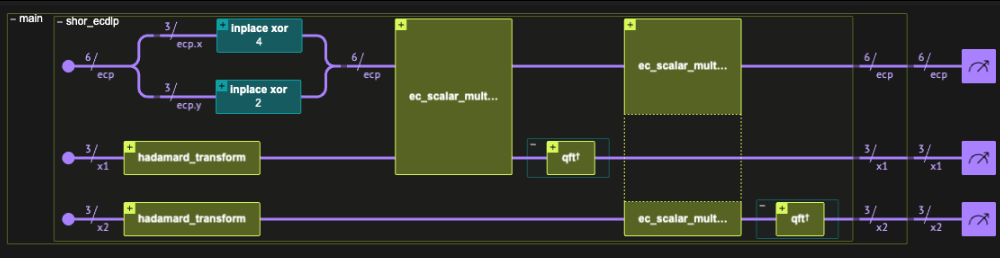

#### Model creation and synthesis

In [9]:
print("Creating model for Shor's ECDLP algorithm...")

constraints = Constraints(optimization_parameter="width")
preferences = Preferences(timeout_seconds=3600, optimization_level=1, qasm3=True)
qmod = create_model(main, constraints=constraints, preferences=preferences)
write_qmod(qmod, "elliptic_curve_discrete_log", symbolic_only=False)

print("Synthesizing quantum program...")
qprog_shor_ecdlp = synthesize(qmod)

# Display circuit metrics
num_qubits = qprog_shor_ecdlp.data.width
print(f"Number of qubits: {num_qubits}")
show(qprog_shor_ecdlp)

Creating model for Shor's ECDLP algorithm...
Synthesizing quantum program...
Number of qubits: 23
Quantum program link: https://platform.classiq.io/circuit/32pNhDlGWuyuFvpBxZxsf8S3KJn


#### Quantum Program Analysis

We can analyze the transpiled circuit characteristics from the quantum program object:

In [10]:
qprog_shor_ecdlp.transpiled_circuit.count_ops

{'cx': 63372,
 'p': 46723,
 'u': 20092,
 'rz': 4104,
 'h': 3383,
 'tdg': 2844,
 't': 2844,
 'u1': 792,
 'x': 440}

In [11]:
qprog_shor_ecdlp.transpiled_circuit.depth

83451

#### Execution 

In [12]:
res = execute(qprog_shor_ecdlp).result_value()

#### Results Collection

In [13]:
df = res.dataframe
df_sorted = df.sort_values("count", ascending=False)
df_sorted["probability"] = df_sorted["count"] / df["count"].sum()

print(f"\nQuantum Execution Results:")
print(f"Total distinct pairs: {len(df)}, Total measurements: {df['count'].sum()}")
print("\nTop 10 results:")
print(df_sorted.head(10))


Quantum Execution Results:
Total distinct pairs: 228, Total measurements: 2048

Top 10 results:
      x1     x2  ecp.x  ecp.y  count  probability     bitstring
0  0.000  0.000      3      2     96     0.046875  010011000000
1  0.000  0.000      4      5     91     0.044434  101100000000
2  0.000  0.000      5      0     72     0.035156  000101000000
3  0.000  0.000      3      5     71     0.034668  101011000000
4  0.625  0.625      4      5     71     0.034668  101100101101
5  0.375  0.375      3      2     70     0.034180  010011011011
6  0.625  0.625      3      5     70     0.034180  101011101101
7  0.000  0.000      4      2     65     0.031738  010100000000
8  0.625  0.625      3      2     63     0.030762  010011101101
9  0.625  0.625      4      2     62     0.030273  010100101101


## 5. Post-Processing Results

For post-processing our results, we will follow the same logic as explained in the ["discrete log" notebook](https://github.com/Classiq/classiq-library/blob/main/algorithms/algebraic/discrete_log/discrete_log.ipynb). 

We translate each result to the closest fraction with a denominator, which is the order:

In [14]:
def closest_fraction(x, denominator):
    return round(x * denominator)


df_sorted["x1_rounded"] = closest_fraction(df_sorted.x1, GENERATOR_ORDER)
df_sorted["x2_rounded"] = closest_fraction(df_sorted.x2, GENERATOR_ORDER)
df_sorted.head(10)

,x1,x2,ecp.x,ecp.y,count,probability,bitstring,x1_rounded,x2_rounded
0,0.000,0.000,3,2,96,0.046875,010011000000,0.0,0.0
1,0.000,0.000,4,5,91,0.044434,101100000000,0.0,0.0
2,0.000,0.000,5,0,72,0.035156,000101000000,0.0,0.0
3,0.000,0.000,3,5,71,0.034668,101011000000,0.0,0.0
4,0.625,0.625,4,5,71,0.034668,101100101101,3.0,3.0
5,0.375,0.375,3,2,70,0.034180,010011011011,2.0,2.0
6,0.625,0.625,3,5,70,0.034180,101011101101,3.0,3.0
7,0.000,0.000,4,2,65,0.031738,010100000000,0.0,0.0
8,0.625,0.625,3,2,63,0.030762,010011101101,3.0,3.0
9,0.625,0.625,4,2,62,0.030273,010100101101,3.0,3.0


Now, we take a sample where `x2` is co-prime to the order, such that we can get the logarithm by multiplying `x1` by the modular inverse. If the `x1`, `x2` registers are large enough, we are guaranteed to sample it with a good probability.

From the valid solutions, we solve for the discrete logarithm using:
$$\text{logarithm} = - x_1 \cdot x_2^{-1} \bmod r$$

In [15]:
import numpy as np


def modular_inverse(x):
    return [pow(a, -1, GENERATOR_ORDER) for a in x]


df_sorted = df_sorted[
    np.gcd(df_sorted.x2_rounded.astype(int), GENERATOR_ORDER) == 1
].copy()
df_sorted["x2_inverse"] = modular_inverse(df_sorted.x2_rounded.astype("int"))
df_sorted["logarithm"] = -df_sorted.x1_rounded * df_sorted.x2_inverse % GENERATOR_ORDER
df_sorted.head(10)

,x1,x2,ecp.x,ecp.y,count,probability,bitstring,x1_rounded,x2_rounded,x2_inverse,logarithm
4,0.625,0.625,4,5,71,0.034668,101100101101,3.0,3.0,2,4.0
5,0.375,0.375,3,2,70,0.034180,010011011011,2.0,2.0,3,4.0
6,0.625,0.625,3,5,70,0.034180,101011101101,3.0,3.0,2,4.0
8,0.625,0.625,3,2,63,0.030762,010011101101,3.0,3.0,2,4.0
9,0.625,0.625,4,2,62,0.030273,010100101101,3.0,3.0,2,4.0
10,0.625,0.625,5,0,60,0.029297,000101101101,3.0,3.0,2,4.0
11,0.375,0.375,5,0,59,0.028809,000101011011,2.0,2.0,3,4.0
12,0.375,0.375,4,2,56,0.027344,010100011011,2.0,2.0,3,4.0
13,0.375,0.375,4,5,48,0.023438,101100011011,2.0,2.0,3,4.0
14,0.750,0.750,3,2,43,0.020996,010011110110,4.0,4.0,4,4.0


In [16]:
assert len(df_sorted.logarithm) > 0
assert np.allclose(df_sorted.logarithm[:10], 4)

#### **Quantum Algorithm Success**


*<div class="alert alert-success">The fact that multiple valid pairs yield the **same discrete logarithm (l = 4)** confirms the quantum algorithm worked correctly, extracting the hidden period structure from Shor's algorithm. </div>*

#### Algorithm Complexity and Quantum Advantage

**Classical Complexity**: The best known classical algorithms for ECDLP (such as Pollard's rho algorithm) require $O(\sqrt{n})$ operations, where $n$ is the order of the elliptic curve group. For cryptographically relevant curves with 256-bit keys, this means approximately $2^{128}$ operations.

**Quantum Complexity**: Shor's algorithm reduces this to $O((\log n)^3)$ operations using $O(\log n)$ qubits, providing an exponential speedup. For the same 256-bit curves, this reduces to approximately $2^{24}$ operations.

## References

<a id='Roetteler'>[1]</a>: [ Martin Roetteler, Michael Naehrig, Krysta M. Svore, and Kristin Lauter. "Quantum resource estimates for computing elliptic curve discrete logarithms." *arXiv preprint arXiv:1706.06752* (2017).](https://arxiv.org/pdf/1706.06752)

<a id='Shor'>[2]</a>: [Peter W. Shor. "Polynomial-time algorithms for prime factorization and discrete logarithms on a quantum computer." *SIAM Journal on Computing*, 26(5):1484-1509 (1997). ](https://arxiv.org/abs/quant-ph/9508027)



